In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.datasets import make_classification, make_regression
from sklearn.metrics import classification_report
from xgboost import XGBClassifier


In [71]:
mimic = pd.read_csv("Avg_8hr.csv")
mimic.head()

,subject_id,hospital_expire_flag,death_discharge_time,length_of_stay,gender,dob,ethnicity,heart_rate,diastolic_blood_pressure,systolic_blood_pressure,...,chloride,creatinine,glucose,hemoglobin,hematocrit,platelet_count,potassium,partial_thromboplastin_time,sodium,white_blood_cells
0,36,0,2134-05-16 14:00:00,4.3483,M,2061-08-17 00:00:00,WHITE,85.586538,NaN,NaN,...,106.500000,0.900000,110.666667,11.540000,33.590909,187.800000,3.850000,67.366667,141.500000,11.760000
1,109,0,2142-08-30 14:23:00,3.2197,F,2117-08-07 00:00:00,BLACK/AFRICAN AMERICAN,90.269448,122.372093,186.302326,...,104.760000,6.690667,99.906667,7.930435,24.178049,122.800000,5.001266,70.686739,136.533333,4.392754
2,124,1,2166-02-01 06:55:00,22.9075,M,2090-11-19 00:00:00,WHITE,77.238364,45.500000,142.500000,...,107.000000,2.266667,135.531250,9.484848,26.720455,83.852941,4.151613,37.086667,136.933333,8.656250
3,154,0,2127-12-25 23:00:00,2.0859,M,2073-07-26 00:00:00,WHITE,74.137255,NaN,NaN,...,107.500000,1.000000,123.500000,11.150000,33.550000,171.000000,4.200000,100.660000,139.500000,9.400000
4,188,1,2162-01-16 16:00:00,6.0823,M,2105-05-18 00:00:00,WHITE,78.815745,62.773270,114.546539,...,101.595238,2.829268,142.276596,9.761905,28.175472,78.191489,3.742857,42.122500,135.714286,9.163415


In [72]:
mimic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10067 entries, 0 to 10066
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   subject_id                     10067 non-null  int64  
 1   hospital_expire_flag           10067 non-null  int64  
 2   death_discharge_time           10067 non-null  object 
 3   length_of_stay                 10067 non-null  float64
 4   gender                         10067 non-null  object 
 5   dob                            10067 non-null  object 
 6   ethnicity                      10067 non-null  object 
 7   heart_rate                     9241 non-null   float64
 8   diastolic_blood_pressure       5940 non-null   float64
 9   systolic_blood_pressure        5942 non-null   float64
 10  blood_pressure                 6013 non-null   float64
 11  temperature                    1371 non-null   float64
 12  pheripheral_oxygen_saturation  9239 non-null  

In [73]:
mimic.describe()

,subject_id,hospital_expire_flag,length_of_stay,heart_rate,diastolic_blood_pressure,systolic_blood_pressure,blood_pressure,temperature,pheripheral_oxygen_saturation,respiratory_rate,...,chloride,creatinine,glucose,hemoglobin,hematocrit,platelet_count,potassium,partial_thromboplastin_time,sodium,white_blood_cells
count,10067.000000,10067.000000,10067.000000,9241.000000,5940.000000,5942.000000,6013.000000,1371.000000,9239.000000,9240.000000,...,10065.000000,10065.000000,10064.000000,10065.000000,10065.000000,10065.000000,10065.000000,9611.000000,10065.000000,10065.000000
mean,60177.562928,0.157246,6.188951,87.536739,64.575438,120.534005,81.061878,38.523466,103.948673,21.484602,...,107.670330,4.117604,136.647301,12.340013,125.753731,222.514200,16.450770,40.821419,141.367081,13.852959
std,24678.873392,0.364051,6.252385,150.023999,113.063789,17.239272,20.950369,10.190671,519.204040,180.223806,...,251.124892,269.400606,271.764131,203.436435,8369.687812,246.751486,1022.403650,224.459323,249.279764,231.923378
min,36.000000,0.000000,2.000000,41.520000,6.000000,11.000000,-34.333333,-3.000000,78.000000,8.227273,...,82.387097,-0.786364,54.400000,5.414286,16.700000,7.333333,2.450000,17.300000,114.433333,0.100000
25%,43079.000000,0.000000,2.837400,76.769559,53.849829,109.491639,73.200000,36.489606,95.845738,17.197842,...,102.000000,0.720000,112.000000,9.220000,27.508333,145.785714,3.816129,28.035417,136.700000,8.300000
50%,61764.000000,0.000000,3.963100,85.304094,59.847496,118.802049,79.533333,37.010526,96.912162,19.301479,...,105.000000,0.975000,126.600000,10.030000,29.695000,204.333333,4.031818,33.010000,138.884615,10.750000
75%,80949.500000,0.000000,6.905600,94.727273,66.769584,130.195455,87.592453,37.694722,97.849767,21.683673,...,107.800000,1.540000,147.217672,11.183333,33.166667,274.750000,4.285714,43.803571,141.142857,13.600000
max,99995.000000,1.000000,79.109000,14447.934003,6736.267333,482.571429,758.050449,101.000000,48397.260870,17340.522059,...,25110.700000,27028.483784,27184.513514,20419.379184,833360.491667,22369.711111,99485.442857,21770.963043,25144.625000,23271.397674


In [74]:
mimic.isnull().sum()

subject_id                          0
hospital_expire_flag                0
death_discharge_time                0
length_of_stay                      0
gender                              0
dob                                 0
ethnicity                           0
heart_rate                        826
diastolic_blood_pressure         4127
systolic_blood_pressure          4125
blood_pressure                   4054
temperature                      8696
pheripheral_oxygen_saturation     828
respiratory_rate                  827
albumin                          3999
blood_urea_nitrogen                 2
bilirubin                        8748
lactate                          4571
bicarbonate                         2
band_neutrophil                  7189
chloride                            2
creatinine                          2
glucose                             3
hemoglobin                          2
hematocrit                          2
platelet_count                      2
potassium   

In [75]:
missing_percent = (mimic.isnull().sum() / len(mimic)) * 100

missing_df = pd.DataFrame({'Column': mimic.columns, 'Missing%': missing_percent})
missing_df = missing_df.sort_values(by='Missing%', ascending=False).reset_index(drop=True)
missing_df

,Column,Missing%
0,bilirubin,86.897785
1,temperature,86.381246
2,band_neutrophil,71.411543
3,lactate,45.405781
4,diastolic_blood_pressure,40.995331
5,systolic_blood_pressure,40.975464
6,blood_pressure,40.270190
7,albumin,39.723850
8,pheripheral_oxygen_saturation,8.224893
9,respiratory_rate,8.214960


The percentage of missing values is too high in the first 7 columns, so i will drop them, the rest will be imputed by median or mean depending on if they died or not

<Axes: >

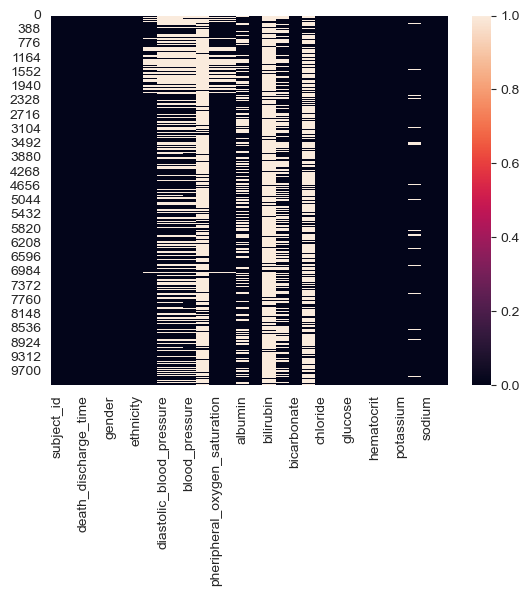

In [76]:
sns.heatmap(mimic.isnull())

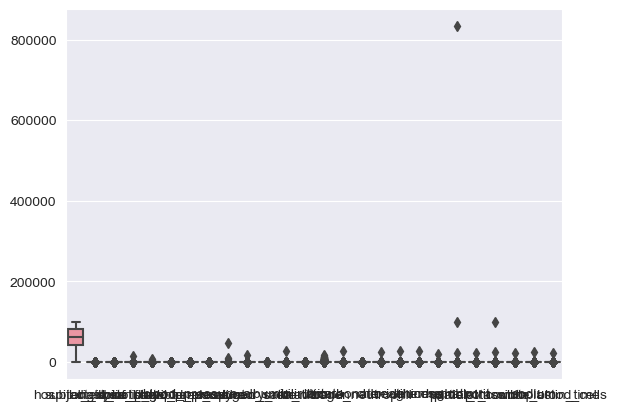

In [77]:
# Box plots for numerical variables (optional)
sns.boxplot(data=mimic)
plt.show()


boxplot shows few outliers

In [78]:
categorical_cols = mimic.select_dtypes(include='object').columns.tolist()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4024\3960342736.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = mimic.corr()


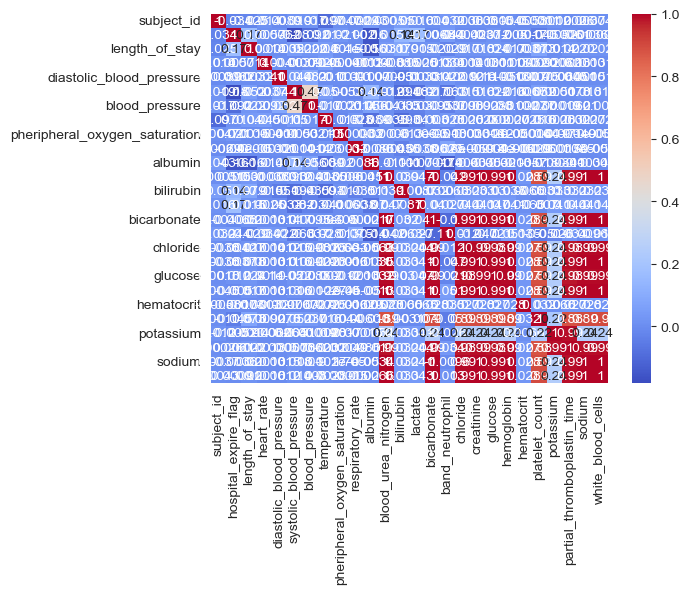

In [79]:
# Heatmap for correlation matrix of numerical variables
correlation_matrix = mimic.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

We can see quite a lot of correlation between the variables, therefore i will be using multidimensional scaling for numerical variables

### Cleaning

In [80]:
# Separate data based on hospital_expire_flag
df_flag0 = mimic[mimic['hospital_expire_flag'] == 0]
df_flag1 = mimic[mimic['hospital_expire_flag'] == 1]

# Calculate median for each subset
median_flag0 = df_flag0.median()
median_flag1 = df_flag1.median()

# Impute missing values based on the respective medians
df_flag0_imputed = df_flag0.fillna(median_flag0)
df_flag1_imputed = df_flag1.fillna(median_flag1)

# Combine back into a single dataframe
df_imputed = pd.concat([df_flag0_imputed, df_flag1_imputed], axis=0)

# Ensure all missing values are handled
df_imputed = df_imputed.fillna(median_flag0)  # Filling any remaining NaNs with overall median of flag 0

# Optionally, verify that all missing values are handled
print(df_imputed.isnull().sum())

# Create a dictionary to map genders to numbers
gender_map = {'M': 0, 'F': 1}

# Use the map function to apply the mapping to the 'gender' column
df_imputed['gender'] = df_imputed['gender'].map(gender_map)



subject_id                       0
hospital_expire_flag             0
death_discharge_time             0
length_of_stay                   0
gender                           0
dob                              0
ethnicity                        0
heart_rate                       0
diastolic_blood_pressure         0
systolic_blood_pressure          0
blood_pressure                   0
temperature                      0
pheripheral_oxygen_saturation    0
respiratory_rate                 0
albumin                          0
blood_urea_nitrogen              0
bilirubin                        0
lactate                          0
bicarbonate                      0
band_neutrophil                  0
chloride                         0
creatinine                       0
glucose                          0
hemoglobin                       0
hematocrit                       0
platelet_count                   0
potassium                        0
partial_thromboplastin_time      0
sodium              

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4024\3059947470.py:6: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median_flag0 = df_flag0.median()
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4024\3059947470.py:7: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median_flag1 = df_flag1.median()


In [81]:
columns_to_drop = ['temperature', 'bilirubin', 'band_neutrophil', 'lactate',
                   'diastolic_blood_pressure', 'systolic_blood_pressure',
                   'blood_pressure', 'albumin','death_discharge_time','dob','subject_id']
mimic_imputed = df_imputed.drop(columns_to_drop, axis=1)


Dropped columns that had too many missing values and date values which cannot be used in the ML model

<Axes: >

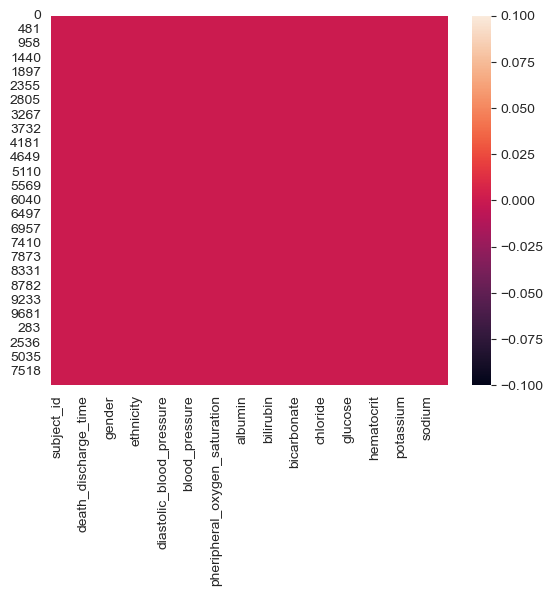

In [82]:
sns.heatmap(df_imputed.isnull())

In [83]:
mimic_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10067 entries, 0 to 10060
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   hospital_expire_flag           10067 non-null  int64  
 1   length_of_stay                 10067 non-null  float64
 2   gender                         10067 non-null  int64  
 3   ethnicity                      10067 non-null  object 
 4   heart_rate                     10067 non-null  float64
 5   pheripheral_oxygen_saturation  10067 non-null  float64
 6   respiratory_rate               10067 non-null  float64
 7   blood_urea_nitrogen            10067 non-null  float64
 8   bicarbonate                    10067 non-null  float64
 9   chloride                       10067 non-null  float64
 10  creatinine                     10067 non-null  float64
 11  glucose                        10067 non-null  float64
 12  hemoglobin                     10067 non-null 

In [84]:
mimic_imputed.head()

,hospital_expire_flag,length_of_stay,gender,ethnicity,heart_rate,pheripheral_oxygen_saturation,respiratory_rate,blood_urea_nitrogen,bicarbonate,chloride,creatinine,glucose,hemoglobin,hematocrit,platelet_count,potassium,partial_thromboplastin_time,sodium,white_blood_cells
0,0,4.3483,0,WHITE,85.586538,93.250000,18.798077,21.333333,28.500000,106.500000,0.900000,110.666667,11.540000,33.590909,187.800000,3.850000,67.366667,141.500000,11.760000
1,0,3.2197,1,BLACK/AFRICAN AMERICAN,90.269448,98.531805,18.474638,40.701299,20.337838,104.760000,6.690667,99.906667,7.930435,24.178049,122.800000,5.001266,70.686739,136.533333,4.392754
3,0,2.0859,0,WHITE,74.137255,97.500000,18.156863,12.500000,25.000000,107.500000,1.000000,123.500000,11.150000,33.550000,171.000000,4.200000,100.660000,139.500000,9.400000
5,0,5.9447,0,ASIAN - CHINESE,84.555556,96.940603,19.082192,27.222222,19.555556,112.444444,2.037500,149.444444,12.300000,35.466667,263.166667,3.877778,54.075000,144.222222,13.650000
6,0,5.2517,0,WHITE,78.098485,97.626866,17.916667,22.125000,26.166667,102.000000,1.062500,141.000000,9.450000,25.340000,249.142857,4.291667,34.075000,134.800000,15.671429


In [85]:
X = mimic_imputed.drop(['hospital_expire_flag','ethnicity'], axis=1)  # cant use one-hot on ethnicity-too many values
y = mimic_imputed['hospital_expire_flag']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the classifier
gb_clf.fit(X_train, y_train)

# Predictions
y_pred_gb = gb_clf.predict(X_test)

# Evaluate performance
print("Gradient Boosting Classifier:")
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1699
           1       0.73      0.38      0.50       315

    accuracy                           0.88      2014
   macro avg       0.81      0.68      0.72      2014
weighted avg       0.87      0.88      0.87      2014


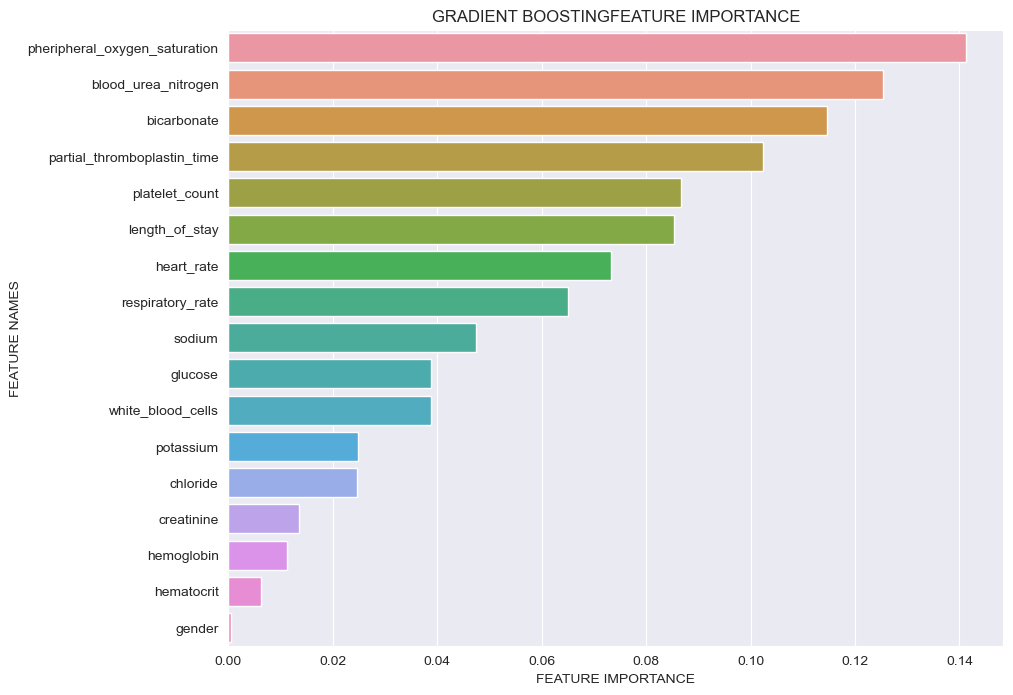

In [92]:
def plot_feature_importance(importance, names, model_type):
    # Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    # Create DataFrame using a dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    # Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    # Define size of bar plot
    plt.figure(figsize=(10,8))
    # Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    # Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    
    # Visualize the gradient boosting feature importances
    plt.show()

# Call function to plot the feature importance
plot_feature_importance(gb_clf.feature_importances_, X.columns, 'GRADIENT BOOSTING')


In [86]:

# Initialize Gradient Boosting Classifier on PCA-transformed data
gb_clf_pca = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the classifier on PCA-transformed data
gb_clf_pca.fit(X_train_pca, y_train)

# Obtain feature importances
feature_importances = gb_clf_pca.feature_importances_

# Print feature importances for PCA-transformed components
print("Feature Importances (PCA Components):")
print(feature_importances)

# Map feature importances back to original feature names
original_feature_names = list(X.columns)  # Assuming X is the original DataFrame before PCA

# Create a dictionary mapping original feature names to their importances
feature_importances_dict = dict(zip(original_feature_names, feature_importances))

# Sort features by importance (optional but helpful)
sorted_features = sorted(feature_importances_dict.items(), key=lambda x: x[1], reverse=True)

# Print sorted feature importances
print("\nSorted Feature Importances:")
for feature, importance in sorted_features:
    print(f"{feature}: {importance}")

# Select top features based on importance
top_features = [feature for feature, importance in sorted_features][:10]  # Adjust number of top features as needed

print("\nTop Selected Features:")
print(top_features)


Feature Importances (PCA Components):
[0.30239381 0.07272276 0.05180767 0.22451609 0.0938965  0.07489953
 0.02570002 0.06796429 0.04236778 0.04373155]

Sorted Feature Importances:
length_of_stay: 0.30239381323431236
pheripheral_oxygen_saturation: 0.22451608519713787
respiratory_rate: 0.09389649734976636
blood_urea_nitrogen: 0.07489952910341133
gender: 0.07272275970415265
chloride: 0.06796429215149938
heart_rate: 0.05180766693010561
glucose: 0.04373154932250199
creatinine: 0.04236778333002773
bicarbonate: 0.025700023677084672

Top Selected Features:
['length_of_stay', 'pheripheral_oxygen_saturation', 'respiratory_rate', 'blood_urea_nitrogen', 'gender', 'chloride', 'heart_rate', 'glucose', 'creatinine', 'bicarbonate']


From this we can see that BUN is the most important feature followed by pheripheral_oxygen_saturation, bicarbonate,etc. in the study, they found platelete count and BUN to be most important, and they are in the top 5 of my results

In [87]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize PCA
pca = PCA(n_components=10)  # Choose number of components

# Fit PCA on scaled data
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Example of how to use PCA-transformed data in a model (e.g., Gradient Boosting)
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Initialize Gradient Boosting Classifier on PCA-transformed data
gb_clf_pca = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    
# Fit the classifier on PCA-transformed data
gb_clf_pca.fit(X_train_pca, y_train)

# Predictions
y_pred_gb_pca = gb_clf_pca.predict(X_test_pca)

# Evaluate performance
print("Gradient Boosting Classifier on PCA-transformed data:")
print(classification_report(y_test, y_pred_gb_pca))

Explained variance ratio: [0.57814139 0.06046121 0.05913529 0.05884037 0.05879106 0.05874008
 0.05729533 0.05486703 0.01057728 0.00133423]
Gradient Boosting Classifier on PCA-transformed data:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1699
           1       0.58      0.15      0.24       315

    accuracy                           0.85      2014
   macro avg       0.72      0.57      0.58      2014
weighted avg       0.82      0.85      0.81      2014


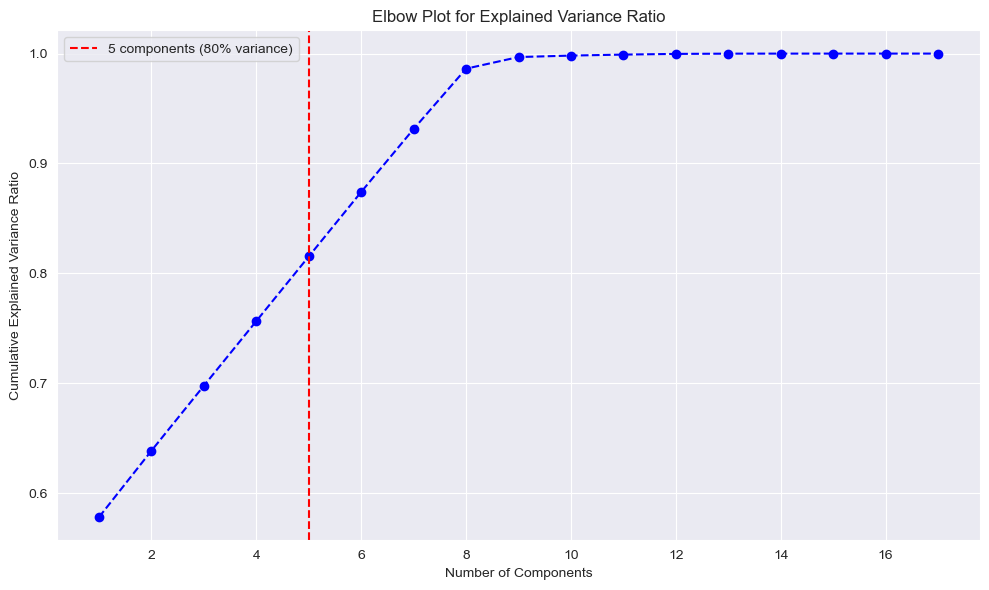

Number of components to explain 80% variance: 5


In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming X_scaled is already standardized
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Initialize PCA
pca = PCA()

# Fit PCA on scaled data
pca.fit(X_scaled)

# Calculate cumulative explained variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Determine the number of components to explain 80% variance
n_components = np.argmax(cumulative_variance_ratio >= 0.8) + 1

# Plotting the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Elbow Plot for Explained Variance Ratio')
plt.axvline(x=n_components, color='r', linestyle='--', label=f'{n_components} components (80% variance)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Number of components to explain 80% variance: {n_components}")


We can see 5 selections with PCA

Gradient Boosting Classifier on PCA-transformed Data:
Accuracy: 0.85
Precision (Class 1): 0.52
Recall (Class 1): 0.14
F1-score (Class 1): 0.22
Regular Gradient Boosting Classifier:
Accuracy: 0.88
Precision (Class 1): 0.72
Recall (Class 1): 0.37
F1-score (Class 1): 0.49
Comparison:
Accuracy:

The regular Gradient Boosting Classifier has a higher accuracy (0.88) compared to the PCA-transformed data (0.85). This suggests that using PCA for dimensionality reduction slightly reduces the accuracy of the classifier.
Precision and Recall for Class 1:

The regular Gradient Boosting Classifier shows higher precision (0.72 vs 0.52) and recall (0.37 vs 0.14) for predicting the positive class (hospital_expire_flag = 1). This indicates that the regular classifier performs better at correctly identifying positive cases and has fewer false positives compared to the PCA-transformed data.
F1-score:

The F1-score for Class 1 (harmonic mean of precision and recall) is also higher with the regular Gradient Boosting Classifier (0.49 vs 0.22), indicating better overall performance in terms of both precision and recall for predicting the positive class.
Interpretation:
Regular Gradient Boosting Classifier: It performs better in terms of accuracy and predicting the minority class (hospital_expire_flag = 1), which is crucial for scenarios where correctly identifying patients at risk of hospital expiration is more critical.

Gradient Boosting Classifier on PCA-transformed Data: While it provides dimensionality reduction benefits and maintains a good overall accuracy, it sacrifices some performance in predicting the minority class, possibly due to the loss of specific feature details through PCA.